# Exploratory Data Analysis

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from my_utilities import split_df_features_target

In [2]:
# Load both the training and test data, and combine them
with open('cleaned_data/train_data.pickle', 'rb') as f:
    data = pickle.load(f)
df_train = data['df']
unique_items = data['unique_items']
with open('cleaned_data/test_data.pickle', 'rb') as f:
    data = pickle.load(f)
df_test = data['df']
df = pd.concat([df_train, df_test])
df.sort_values(by='datetime', inplace=True)
df.head()

,tid,month,day_of_month,day_of_week,datetime,hour,items
12546,12546,5,3,6,2015-05-03 03:24:22.936,3,[445106]
10942,10942,5,3,6,2015-05-03 03:58:52.433,3,[440917]
4974,4974,5,3,6,2015-05-03 04:52:21.565,4,[441645]
5846,5846,5,3,6,2015-05-03 04:56:55.471,4,[441645]
3062,3062,5,3,6,2015-05-03 05:00:11.937,5,[210087]


# Distribution of the number of items in an order

In [3]:
# Compute the probabilities
n_first_items_vals = []
prob_add_purchase = []
n_samples = []
for n_first_items in range(1, 30):
    _, df_target = split_df_features_target(df, unique_items, n_first_items)
    if df_target is None: break
    n_samples.append(len(df_target))
    n_first_items_vals.append(n_first_items)
    prob_add_purchase.append(np.mean([len(item_list) > 0 for item_list in df_target['purchased_items']]))

df_prob_add_purchase = pd.DataFrame(index=n_first_items_vals)
df_prob_add_purchase.index.name = 'n_first_items_vals'
df_prob_add_purchase['n_samples'] = n_samples
df_prob_add_purchase['prob_add_purchase'] = prob_add_purchase
df_prob_add_purchase

,n_samples,prob_add_purchase
n_first_items_vals,,
1,9623,0.090408
2,870,0.268966
3,234,0.371795
4,87,0.505747
5,44,0.613636
6,27,0.629630
7,17,0.588235
8,10,0.700000
9,7,0.857143


In [4]:
print(f"Probability of purchasing more", \
      f"= {sum(np.array(prob_add_purchase) * np.array(n_samples)) / sum(n_samples)}")

Probability of purchasing more = 0.12054469018460975


In [5]:
# Estimate the standard error
n_first_items_vals = np.array(n_first_items_vals)
prob_add_purchase = np.array(prob_add_purchase)
n_samples = np.array(n_samples)
std_err = np.sqrt(prob_add_purchase * (1 - prob_add_purchase) / n_samples)

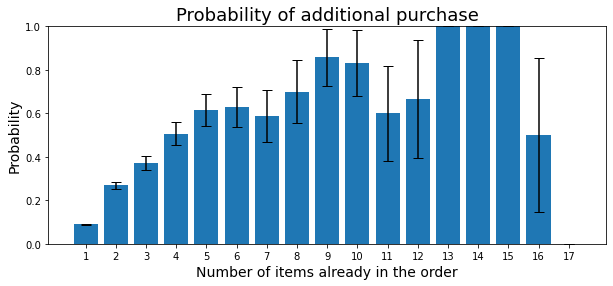

In [6]:
plt.figure(figsize=(10, 4))
plt.bar(n_first_items_vals, prob_add_purchase)
plt.errorbar(n_first_items_vals, prob_add_purchase, std_err, color='k', linestyle='', capsize=5)
plt.xticks(n_first_items_vals)
plt.ylim([0, 1])
plt.title('Probability of additional purchase', fontsize=18)
plt.xlabel('Number of items already in the order', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.show()